<a href="https://colab.research.google.com/github/parveen78/OIBSIP-/blob/main/Credit_card_approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

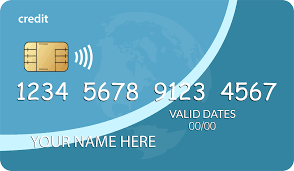

#INTRODUCTION
Credit score cards are a common risk control method in the financial industry. It uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings. The bank is able to decide whether to issue a credit card to the applicant. Credit scores can objectively quantify the magnitude of risk.

#Objective of the study:
Credit Card department in a bank is a leading data science adopter. Acquiring new credit card users is always a key priority for the bank. Giving credit cards without due diligence or assessment for creditworthiness is a huge risk.

From the last many decades, the credit card department is using a data-driven credit assessment methodology called Credit Scoring, and the model is called application scorecard. The application scorecard helps in the calculating level of risk associated with an applicant and based on strategic priority at a time, they decide the cut off value of the score for approving or rejecting a credit card application.

#Data
Two files are available. One Credit_card data, and the second one credit_card_label status information.

The application data will be used for feature creation. And the status (credit card label status) will be required for defining the labels - which of the applications have Rejected and which of these are approved.

#Application
For a credit card, the customers fill-up the form - online or a physical. The application information is used for assessing the creditworthiness of the customer. In addition to the application information, the Credit Bureau Score e.g. FICO Score in the US, CIBIL Score in India, and other internal information about the applicants are used for the decision.

Also, gradually the banks are considering a lot of external data to improve the quality of credit decisions.

Now, we will read and explore the Credit_card data file provided.

In [4]:
# Importing the Basic library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
from fancyimpute import KNN
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix



In [5]:
!pip install fancyimpute # fancy impute installer 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import warnings
warnings.filterwarnings("ignore") # ignoring wranings

In [7]:
Cr1=pd.read_csv("Credit_card.csv") # It read the CSV file

#Basic Visulalization and Exploratary Data Analysis

In [8]:
Cr1.head() # top 5 rows

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [9]:
Cr1.tail() # Bottom 5 rows

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2
1547,5053790,F,Y,Y,0,225000.0,Working,Higher education,Married,House / apartment,-16601.0,-2859,1,0,0,0,NaN,2


In [10]:
Cr1.info() # Information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [11]:
Cr1.describe() 

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000


* We can observe from the output that the average annual income of the people in the dataset is 1.665000e+05	. The standard deviation of the annual income is 1.132530e+05. The minimum annual income is 3.375000e+04	 and the maximum annual income is 1.575000e+06 so there is some bias or outlier here

* We can also observe that the average number of children is 0 The standard deviation of the number of children is 0.776691. The minimum number of children is 0.0 and the maximum number of children is 14.0. Here we also find some otliers




#Credit_card_label_Status
Once a credit card is issued, the customer uses it for shopping items of its use, a statement is generated to make a payment toward the dues by due date and the customer makes payment. This is a typical credit card cycle.

In [12]:
Cr2=pd.read_csv("Credit_card_label.csv")

In [13]:
Cr2.head()

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [14]:
Cr2["label"].value_counts()

0    1373
1     175
Name: label, dtype: int64

#So Here in this label 0 and 1 is
* 0 : Application approved
* 1 : Application Rejected

In [15]:
Credit_card=Cr1.merge(Cr2,how="outer")

In [16]:
Credit_card.head()


,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


#Missing value

In [17]:
Credit_card.isnull().sum() # find the missing value

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

<Axes: >

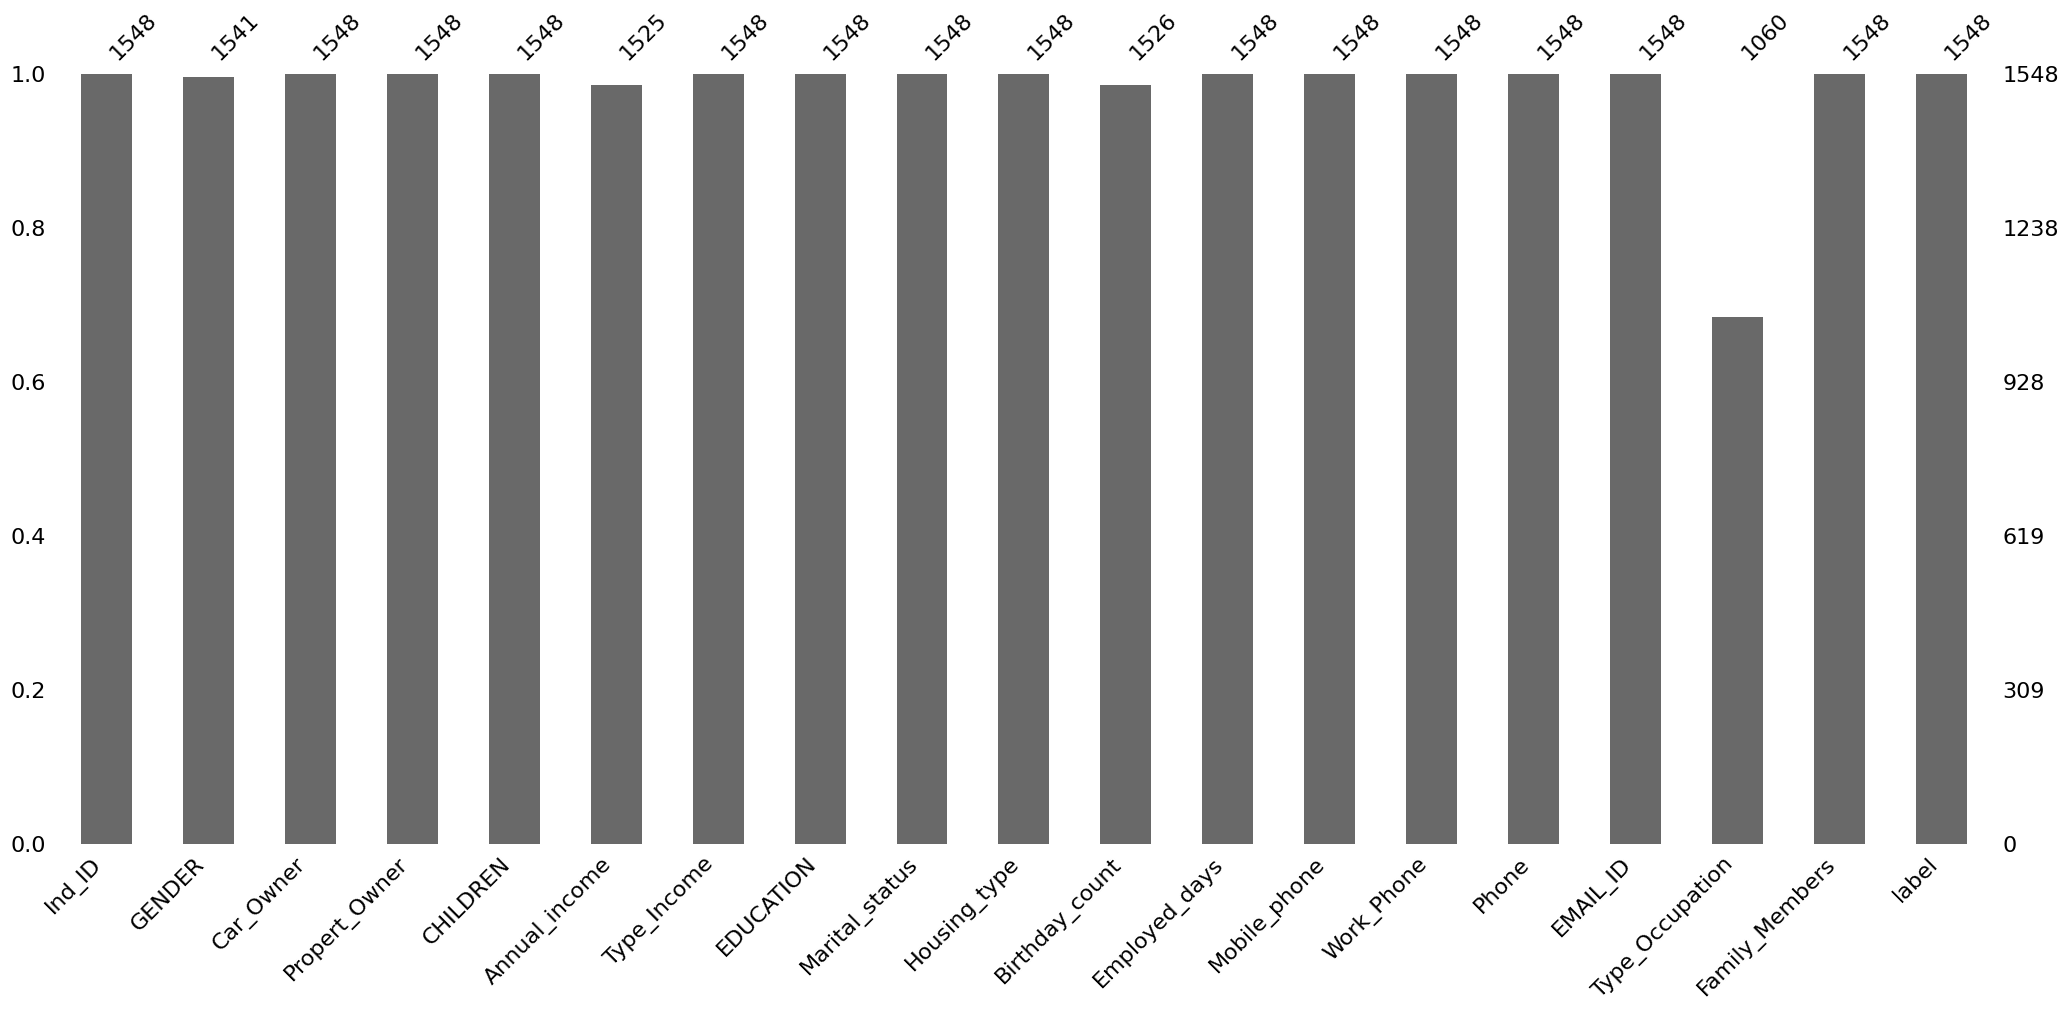

In [18]:
msno.bar(Credit_card)

<Axes: >

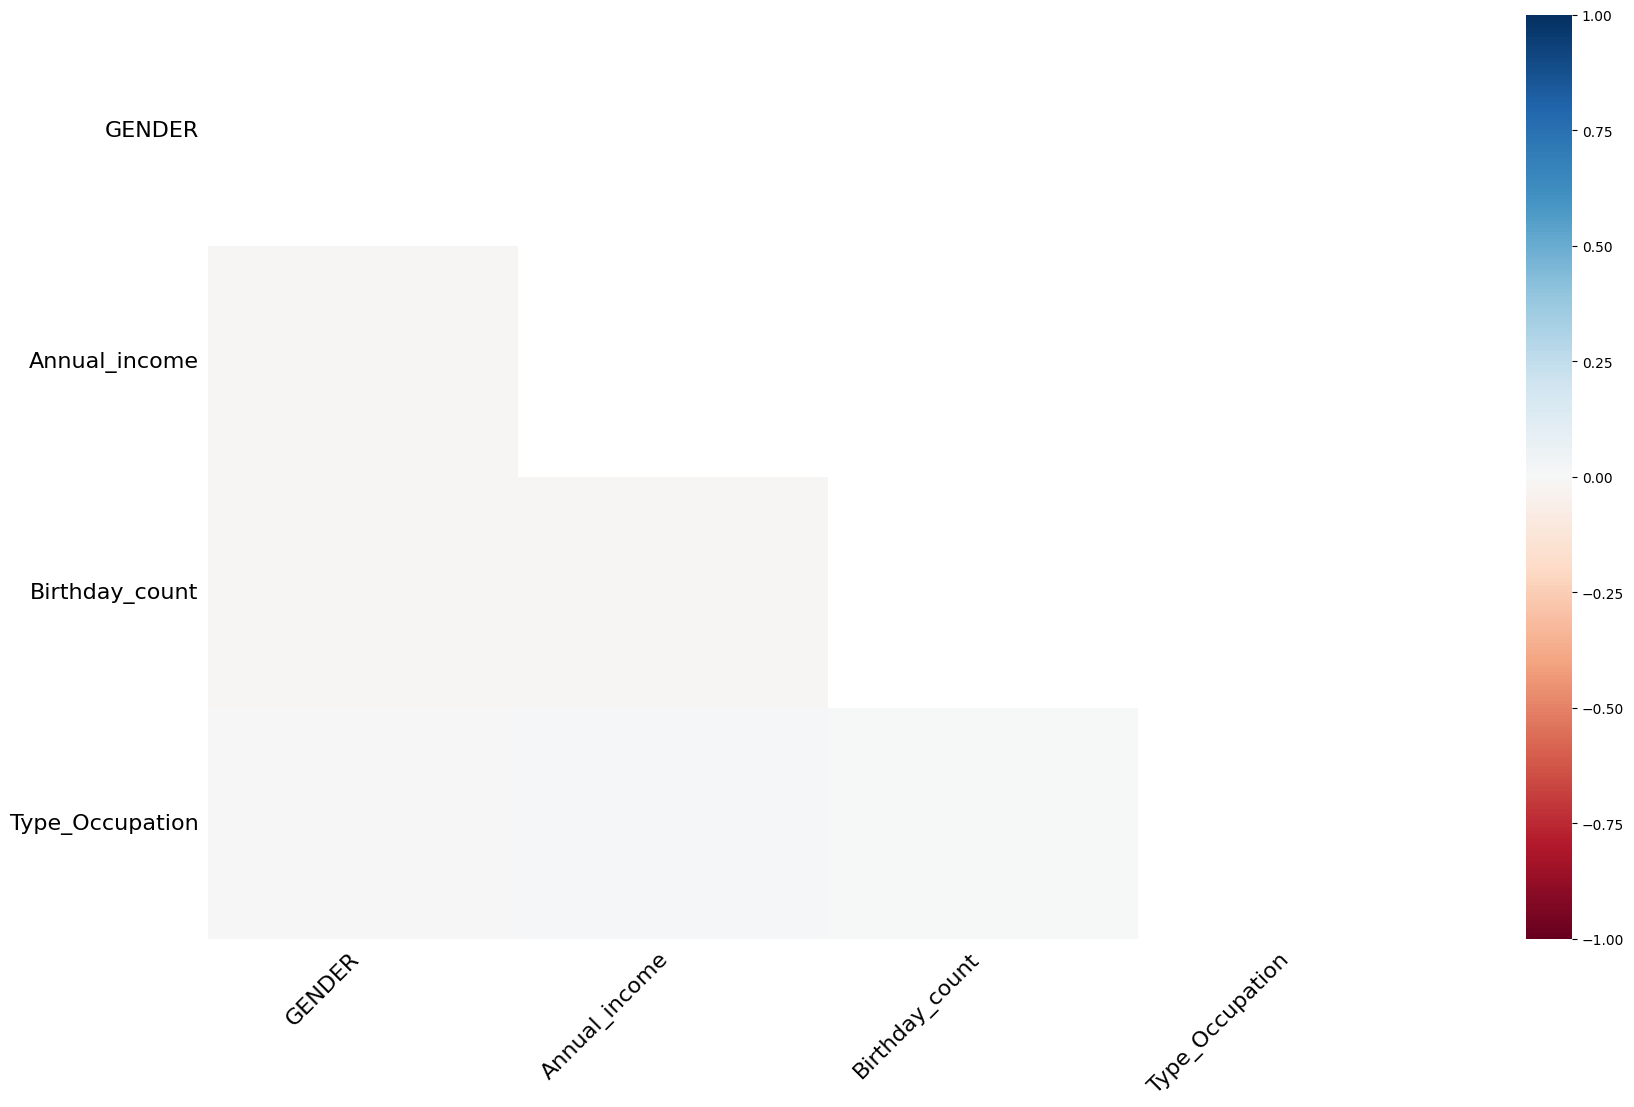

In [19]:
msno.heatmap(Credit_card)

So it is cleary observe that in this dataset there is huge missing value in various columns like gender,Annual_income,Birthday_count,Type_occupation So now we can deal with this....


In [20]:
Credit_card.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'label'],
      dtype='object')

#So now i just drop those columns which do not necessary in my dataset for pediction purpose

In [21]:
Credit_card=Credit_card.drop(['Ind_ID', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type','Mobile_phone','Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation'],axis=1)

In [22]:
Credit_card.isnull().sum()

GENDER             7
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income     23
Birthday_count    22
Employed_days      0
Family_Members     0
label              0
dtype: int64

In [23]:
#dummy encoding
Credit_card['GENDER']=Credit_card.GENDER.map({"F":0,"M":1,"others":2})
Credit_card['Car_Owner']=Credit_card.Car_Owner.map({"Y":0,"N":1})
Credit_card['Propert_Owner']=Credit_card.Propert_Owner.map({"Y":0,"N":1})

In [24]:
Credit_card.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Birthday_count,Employed_days,Family_Members,label
0,1.0,0,0,0,180000.0,-18772.0,365243,2,1
1,0.0,0,1,0,315000.0,-13557.0,-586,2,1
2,0.0,0,1,0,315000.0,NaN,-586,2,1
3,0.0,0,1,0,NaN,-13557.0,-586,2,1
4,0.0,0,1,0,315000.0,-13557.0,-586,2,1


# For Dealing with Missing value we can do a Imputation Techaniques

In [25]:
knn_imputer = KNN() # calling KNN function
Cedit_card_knn = Credit_card.copy(deep=True) # creating copy
Cedit_card_knn.iloc[:, :] = knn_imputer.fit_transform(Cedit_card_knn)


Imputing row 1/1548 with 0 missing, elapsed time: 0.526
Imputing row 101/1548 with 0 missing, elapsed time: 0.528
Imputing row 201/1548 with 0 missing, elapsed time: 0.530
Imputing row 301/1548 with 0 missing, elapsed time: 0.531
Imputing row 401/1548 with 0 missing, elapsed time: 0.532
Imputing row 501/1548 with 0 missing, elapsed time: 0.533
Imputing row 601/1548 with 0 missing, elapsed time: 0.534
Imputing row 701/1548 with 0 missing, elapsed time: 0.535
Imputing row 801/1548 with 0 missing, elapsed time: 0.536
Imputing row 901/1548 with 0 missing, elapsed time: 0.537
Imputing row 1001/1548 with 0 missing, elapsed time: 0.538
Imputing row 1101/1548 with 0 missing, elapsed time: 0.539
Imputing row 1201/1548 with 0 missing, elapsed time: 0.540
Imputing row 1301/1548 with 0 missing, elapsed time: 0.541
Imputing row 1401/1548 with 0 missing, elapsed time: 0.542
Imputing row 1501/1548 with 0 missing, elapsed time: 0.543


In [26]:
Cedit_card_knn.isnull().sum()

GENDER            0
Car_Owner         0
Propert_Owner     0
CHILDREN          0
Annual_income     0
Birthday_count    0
Employed_days     0
Family_Members    0
label             0
dtype: int64

In [27]:
Credit_card=Cedit_card_knn #assigning the value

In [28]:
Credit_card['Age']=-(Credit_card['Birthday_count'])//365     # we give name age column by divide the birthdat count//365
Credit_card['Employee_from_years']=-(Credit_card['Employed_days'])//365   # we give name Employee_from_years  column by divide the Employed_days//365
Credit_card.drop(columns=('Birthday_count'),inplace=True)
Credit_card.drop(columns=('Employed_days'),inplace=True)

In [29]:
Credit_card.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Family_Members,label,Age,Employee_from_years
0,1.0,0.0,0.0,0.0,180000.0,2.0,1.0,51.0,-1001.0
1,0.0,0.0,1.0,0.0,315000.0,2.0,1.0,37.0,1.0
2,0.0,0.0,1.0,0.0,315000.0,2.0,1.0,37.0,1.0
3,0.0,0.0,1.0,0.0,315000.0,2.0,1.0,37.0,1.0
4,0.0,0.0,1.0,0.0,315000.0,2.0,1.0,37.0,1.0


#Now Dealing with outliers which we seen above at the time of describe





In [30]:

fig = px.box(Credit_card, y="Annual_income", height = 500, width = 500)
fig.show()
fig = px.box(Credit_card, y="Employee_from_years", height = 500, width = 500)
fig.show()

#Removing the outliers

In [31]:
q_hi = Credit_card['Annual_income'].quantile(0.999)
q_low = Credit_card['Annual_income'].quantile(0.001)
Credit_card = Credit_card[(Credit_card['Annual_income']>q_low) & (Credit_card['Annual_income']<q_hi)]

In [32]:
q_hi = Credit_card['Employee_from_years'].quantile(0.999)
q_low = Credit_card['Employee_from_years'].quantile(0.001)
Credit_card = Credit_card[(Credit_card['Employee_from_years']>q_low) & (Credit_card['Employee_from_years']<q_hi)]

#After remove the outliers from dataset

In [33]:
fig = px.box(Credit_card, y="Annual_income", height = 500, width = 500)
fig.show()
fig = px.box(Credit_card, y="Employee_from_years", height = 500, width = 500)
fig.show()

In [34]:
Credit_card["Annual_income"]=Credit_card["Annual_income"].astype(int) #convert annual income data type float from int

In [35]:
Credit_card["GENDER"]=Credit_card["GENDER"].astype(int)
Credit_card["Car_Owner"]=Credit_card["Car_Owner"].astype(int)
Credit_card["Propert_Owner"]=Credit_card["Propert_Owner"].astype(int)
Credit_card["CHILDREN"]=Credit_card["CHILDREN"].astype(int)
Credit_card["Family_Members"]=Credit_card["Family_Members"].astype(int)
Credit_card["label"]=Credit_card["label"].astype(int)
Credit_card["Age"]=Credit_card["Age"].astype(int)
Credit_card["Employee_from_years"]=Credit_card["Employee_from_years"].astype(int)

In [36]:
Credit_card.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Family_Members,label,Age,Employee_from_years
1,0,0,1,0,315000,2,1,37,1
2,0,0,1,0,315000,2,1,37,1
3,0,0,1,0,315000,2,1,37,1
4,0,0,1,0,315000,2,1,37,1
5,0,0,1,0,315000,2,1,37,1


In [37]:
Credit_card.tail()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Family_Members,label,Age,Employee_from_years
1543,0,1,0,0,172480,2,0,32,5
1544,0,1,1,0,225000,1,0,28,3
1545,1,0,0,2,180000,4,0,36,6
1546,1,0,1,0,270000,2,0,41,1
1547,0,0,0,0,225000,2,0,45,7


In [38]:
# Split x and y for test and training
X=Credit_card.drop(["label"],axis=1)
y=Credit_card["label"].values
print(f"Xshape:{X.shape} yshape:{y.shape}")

Xshape:(1282, 8) yshape:(1282,)


#Split in Train and test 

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
print(f"X_trainshape:{X_train.shape} y_trainshape:{y_train.shape}")

X_trainshape:(961, 8) y_trainshape:(961,)


#Logestic Regression

In [40]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

#Prediction of Training set

In [41]:
prediction_train=model.predict(X_train)

#Accuracy of Trainning model

In [42]:
Accuracy_train=accuracy_score(y_train,prediction_train)
print("The Accuracy of training set is:",Accuracy_train)

The Accuracy of training set is: 0.8855359001040582


#Prediction of Testing set

In [43]:
prediction_test=model.predict(X_test)

#Accuracy of Testing set

In [45]:
Accuracy_test=accuracy_score(y_test,prediction_test)
print("The Accuracy of testing set is:",Accuracy_test)

The Accuracy of testing set is: 0.9065420560747663


#Final Built the predictive model

In [46]:
prediction_2 = model.predict(np.array([0,0,1,0,315000,2,37,1]).reshape(1, -1))
print(prediction_2)
# if output is 0 application is approved
if (prediction_2==0):
  print("Application Approved")
else:
  print("Application Rejected")

[0]
Application Approved
